In [1]:
import pandas as pd

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt


In [46]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: ...working... done

# All requested packages already installed.



WARNING conda.base.context:use_only_tar_bz2(632): Conda is constrained to only using the old .tar.bz2 file format because you have conda-build installed, and it is <3.18.3.  Update or remove conda-build to get smaller downloads and faster extractions.


# Question 1

In [2]:
df=pd.read_csv("D:/Learning/Applied Data Science/Course 3 Data Visualization with Python/Final Assignment/Topic_Survey_Assignment.csv",
               index_col=0)

df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [3]:
def custom_fx(data):
    data['Very interested']=(data['Very interested']/2233)*100
    data['Somewhat interested']=(data['Somewhat interested']/2233)*100
    data['Not interested']=(data['Not interested']/2233)*100
    data['Very interested'] = pd.Series([round(val, 2) for val in data['Very interested']], index = data.index)
    data['Somewhat interested'] = pd.Series([round(val, 2) for val in data['Somewhat interested']], index = data.index)
    data['Not interested'] = pd.Series([round(val, 2) for val in data['Not interested']], index = data.index)

In [ ]:
#    data['Very interested'] = pd.Series(["{0:.2f}%".format(val * 100) for val in data['Very interested']], index = df.index)
#    data['Somewhat interested'] = pd.Series(["{0:.2f}%".format(val * 100) for val in data['Somewhat interested']], index = df.index)
#    data['Not interested'] = pd.Series(["{0:.2f}%".format(val * 100) for val in data['Not interested']], index = df.index)

In [4]:
custom_fx(df)
df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),59.65,32.65,5.69
Data Analysis / Statistics,75.59,19.88,2.69
Data Journalism,19.21,48.41,27.32
Data Visualization,60.01,32.87,4.57
Deep Learning,56.56,34.48,6.09
Machine Learning,72.95,21.36,3.31


In [14]:
for index,value in enumerate(df['Very interested']):
    label=value
    print(label)

59.65
75.59
19.21
60.01
56.56
72.95


Text(0.5, 1.0, "Percentage of Respondents' Interest in Data Science Areas")

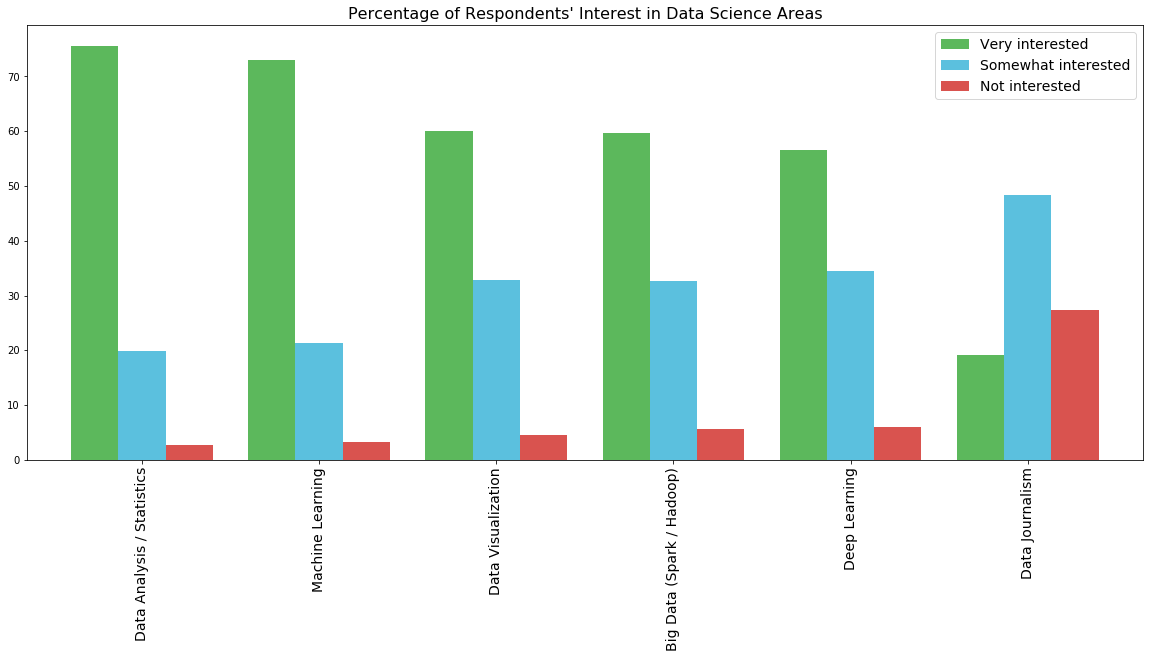

In [25]:
order=['Data Analysis / Statistics','Machine Learning','Data Visualization','Big Data (Spark / Hadoop)','Deep Learning','Data Journalism']

df.loc[order].plot(kind='bar', figsize=(20, 8),
       color=['#5cb85c', '#5bc0de', '#d9534f'],
       width=0.8)

plt.legend(loc=1,fontsize=14)
plt.xticks(fontsize=14)

plt.title("Percentage of Respondents' Interest in Data Science Areas",fontsize=16)   

# Question 2

In [32]:
san=pd.read_csv("D:/Learning/Applied Data Science/Course 3 Data Visualization with Python/Final Assignment/Police_Department_Incidents_-_Previous_Year__2016_.csv")
san

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
5,160002869,ASSAULT,BATTERY,Friday,01/01/2016 12:00:00 AM,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.426077,37.788019,"(37.788018555829, -122.426077177375)",16000286904134
6,160003130,OTHER OFFENSES,PAROLE VIOLATION,Saturday,01/02/2016 12:00:00 AM,00:04,SOUTHERN,"ARREST, BOOKED",MARY ST / HOWARD ST,-122.405721,37.780879,"(37.7808789360214, -122.405721454567)",16000313026150
7,160003259,NON-CRIMINAL,FIRE REPORT,Saturday,01/02/2016 12:00:00 AM,01:02,TENDERLOIN,NONE,200 Block of EDDY ST,-122.411778,37.783981,"(37.7839805592634, -122.411778295992)",16000325968000
8,160003970,WARRANTS,WARRANT ARREST,Saturday,01/02/2016 12:00:00 AM,12:21,SOUTHERN,"ARREST, BOOKED",4TH ST / BERRY ST,-122.393357,37.775788,"(37.7757876218293, -122.393357241451)",16000397063010
9,160003641,MISSING PERSON,FOUND PERSON,Friday,01/01/2016 12:00:00 AM,10:06,BAYVIEW,NONE,100 Block of CAMERON WY,-122.387182,37.720967,"(37.7209669615499, -122.387181635995)",16000364175000


In [39]:
san_count=san.groupby('PdDistrict')['PdId'].count()
san_count=pd.DataFrame({"Neighborhood":san_count.index,'Count':san_count.values})
san_count

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


### Doesn't work... Only works in lab script

In [49]:
# download sf geojson file
!wget --quiet https://cocl.us/sanfran_geojson -O san-francisco.json

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
san_geo = r'san-francisco.json'

# create a plain sf map
world_map = folium.Map(location=[37.77, -122.42], zoom_start=12)

# generate choropleth map
world_map.choropleth(
    geo_data=san_geo,
    data=san_count,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
    
)
world_map